<h1 align=center><font size = 5>Predicting the number of Covid fatalities in London neighborhoods</font></h1>

The idea of creating this notebook came to my mind when I observed an interesting map of "COVID-19 deaths rates for small areas of London (known as MSOAs)".
Developed by City Intelligence for **__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__** the map and the associated dataset is supposed to enable Londoners to observe how COVID-19 deaths in their area may relate to social and demographic structure of the local population. Deprivation and poverty, age and ethnic structure of the neighborhood, extent of pre-existing health conditions and occupational data were considered as possible predictors of number of Covid-19 fatalities. Previous studies had shown "**the mortality risk from COVID-19 is higher for people of older age groups, for men, for people with pre-existing health conditions, and for people from BAME backgrounds. London boroughs had some of the highest mortality rates from COVID-19"** according to the Office for National Statistics (ONS). 
The same source observed "mortality is associated with exposure to occupations classified ‘at risk’ and area deprivation. However, there are still many question marks about COVID-19-related mortality. 
The authors of the mentioned map observed the interaction between occupation and ethnicity needs to be further investigated as none of above mentioned factors, considered alone, is strogly enough associated with deaths for these small areas. **"In some cases it may relate to the age of the population, in others it may relate to the prevalence of underlying health conditions, area deprivation or the proportion of the population working in ‘at risk occupations’, and in some cases a combination of these or none of them"** (__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__, 2020).

* The analysed dataset included the fatalities declared between 1 March 2020 until 17 April 2020 and reported by 20 April 2020. Once the updated dateset will be available this Jupyter Notebook will be also updated. 

* This **Jupyter Notebook** represents an **example** of application of exploratory data analysis (EDA), visual analysis and Multiple Linear Regression. Following the EDA and visual analysis sequence, some of the features (variables) will be selected as possible predictors.  

* The main purpose of this notebook is to check if a set of features can predict the number of deaths at MSOA level. Obviously, there are several limitations of this analysis which I am fully aware of. The data are incomplete now and hopefully when updated numbers containing data from 18th of April until 18 th of June 2020 will be released by ONS the accuracy of the model will improve and will have a better understanding of the association between social and demographic factors and Covid-19 fatalities. We model is built on 4950 cases while the total number of Covid-19 deaths released by ONS for the week 5 - 13 June 2020 was 8222 deaths.  

* Although the final predictive model developed might not be strong enough it still can be valuable as an analytical exercise. 

In [1]:
# Importing relevant packages

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pet
import matplotlib.colors as colors
%matplotlib inline

## importing image 
from IPython.display import Image
from IPython.core.display import HTML 

## setting the working directory
import os

In [2]:
## Map 1. 
Image(url= "https://data.london.gov.uk/download/covid-19-deaths-mapping-tool/1f7ffe75-d15f-48e0-947a-d0b4c34d0692/deaths_per_thousand_msoa_map.png")

As Map 1 above reveals, there are **983 MSOA (Middle Layer Super Output Area)** in Greater London Area. Below it can be observed their average population is **9,062** people, ranging from a minimum of **5,427** to a maximum of **24,969** people.     

In [3]:
#Change the Working Directory
## To avoid some repeated import errors I uploaded the dataset from my own laptop. However it can be found in this Github. 
os.chdir("C://@@ Default Folder Python Notebooks")

**__[Access the Dataset here](https://github.com/sebastianBIanalytics/Data_Science_Machine_Learning_Python/blob/master/Covid%20MSOA%20London.csv)__**



In [4]:
## Importing the dataset with all neighborhoods / wards from London from local folder. 
dataset = pd.read_csv('Covid MSOA London.csv', encoding='ANSI')
dataset.head()

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,total_population_mid_2018,over_70_prop,proportion_at_risk_jobs,insecure_proportion,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,child_poverty_prop,total_registered_patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
0,E02000001,City of London 001,City of London,3,0.344590,8706,0.123593,0.120794,0.077743,0.213695,0.026169,0.033627,0.029288,0.052592,8584,7.95,3.62,2.70,3.08,1.50
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,7720,0.103886,0.345813,0.318841,0.350111,0.167232,0.047970,0.039852,0.273855,8315,9.26,6.15,4.99,3.91,1.88
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,11051,0.085965,0.309099,0.260850,0.453858,0.161075,0.104629,0.080836,0.246672,11873,10.33,7.60,5.79,4.64,1.83
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,6586,0.124658,0.311407,0.265570,0.190230,0.104982,0.016338,0.007603,0.201967,6852,9.34,8.36,4.95,3.58,1.93
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,10229,0.066282,0.337135,0.322392,0.337304,0.168769,0.058748,0.035155,0.231935,11150,9.37,8.79,5.15,4.26,1.47


In [5]:
dataset.shape

(983, 20)

The variable names were modified as seen below. 
The next section will visually explore and give different options for visually exploring the distribution of dependent variable followed by section 2 in which relationships between variables was explored. 

In [6]:
# Rename Variables 
dataset = dataset.rename(columns={'Local authority':'BOROUGH',
                        'covid_19_deaths': 'Fatalities',
                        'covid_19_deaths_per_thousand': 'Fatalities per thousand',
                        'total_population_mid_2018': 'Population',
                        'over_70_prop': '70+ %',
                        'proportion_at_risk_jobs': 'Jobs at risk %',
                        'insecure_proportion': 'Insecure Jobs %',
                        'all_bame_prop': 'BAME %',
                        'all_black_prop': 'Black %',
                        'pakistani_or_bangladeshi_prop': 'Pakistani/Bangladeshi %',
                        'all_indian_prop': 'Indians %',
                        'child_poverty_prop': 'Child Poverty %',
                        'total_registered_patients': 'Patients'})                                  

In [7]:
dataset['Fatalities'].sum()

4950

<h2 align=center><font size = 3>1. Visual and statistical exploration of dependent variable(s) - Covid-19 fatalities</font></h2>

Analysing the absolute number of fatalities in a MSOA it can be observed in average there were 5 Covid-19 related deaths per MSOA between 1st of March until 17th of April as ONS showed. 25% of all MSOA-s have between 0 to 3 deaths, 25% have between 3 and 4 deaths. 25% have between 4 to 7 fatalities and 25% have 7 or more fatalities with a maximum of 28 in one MSOA in the borough of Brent. If analysed as fatalities per 1000 people, in the histogram below it can be observed that at least 99% of MSOA have less than 2 fatalities per 1000 inhabitants.   

The boxplot representing the distribution of fatalities per boroughs indicates that in most boroughs there are 1 - 2 MSOA which exceed the regular number of fatalities. 
Alternatively, the **swarmplot reveals the number of fatalities in each of the 983 MSOA-s from London**.  

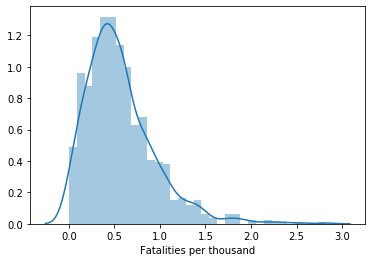

In [8]:
sns.distplot(dataset['Fatalities per thousand'])

In [9]:
dataset.describe()

,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,5.035605,0.561541,9062.137335,0.086806,0.256513,0.221010,0.394199,0.130970,0.053250,0.063838,0.167226,10193.149542,10.028423,5.733927,4.741556,4.184557,1.802187
std,3.548580,0.384306,1938.709043,0.035494,0.052827,0.076413,0.193102,0.104114,0.080336,0.085205,0.075472,2252.389117,2.067200,1.626797,1.341865,0.663466,0.524058
min,0.000000,0.000000,5427.000000,0.016901,0.092176,0.064976,0.038123,0.007140,0.001245,0.003494,0.009362,5887.000000,4.100000,1.730000,1.610000,1.800000,0.600000
25%,3.000000,0.300897,7794.500000,0.060209,0.224707,0.160331,0.237144,0.049274,0.012135,0.017850,0.105967,8643.500000,8.500000,4.610000,3.845000,3.785000,1.390000
50%,4.000000,0.490136,8753.000000,0.079564,0.262953,0.216112,0.373469,0.099700,0.024619,0.031192,0.172158,9845.000000,10.010000,5.600000,4.690000,4.180000,1.720000
75%,7.000000,0.735479,10013.500000,0.106673,0.294113,0.280964,0.536234,0.190551,0.052122,0.064754,0.225499,11336.000000,11.480000,6.740000,5.490000,4.600000,2.205000
max,28.000000,2.827037,24969.000000,0.222585,0.469497,0.407680,0.938644,0.545031,0.534751,0.492892,0.364126,24142.000000,15.980000,10.690000,10.650000,6.120000,3.310000


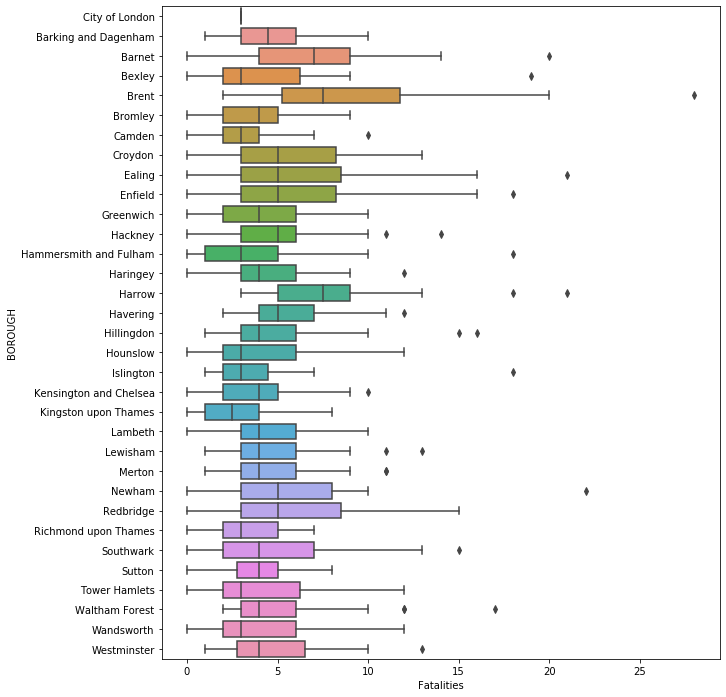

In [10]:
plt.figure(figsize=(10, 12))
sns.boxplot(x ='Fatalities', y='BOROUGH', data=dataset)
plt.show()

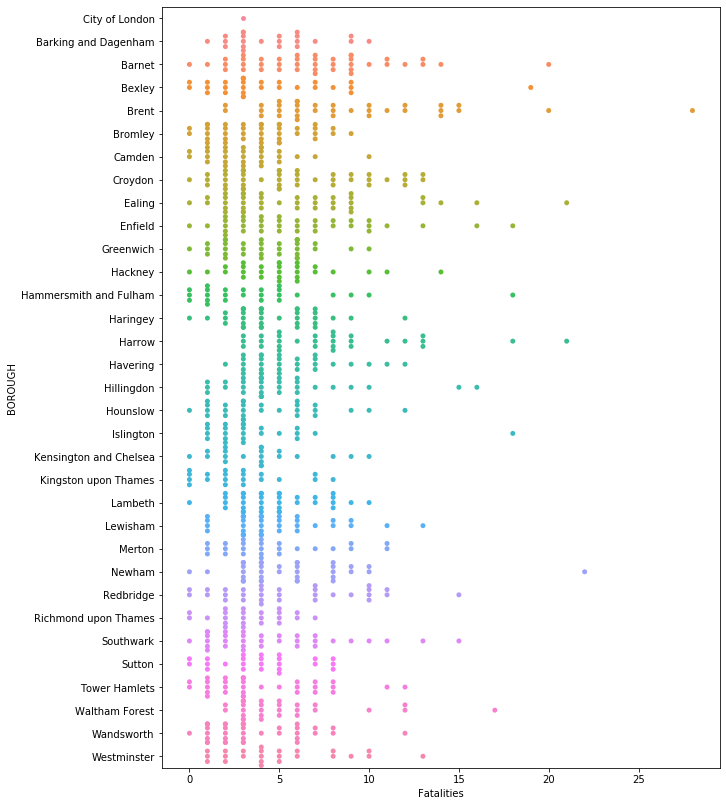

In [11]:

plt.figure(figsize=(10, 14))
sns.swarmplot(x ='Fatalities', y='BOROUGH', data=dataset)
# Show plot
plt.show()



<h2 align=center><font size = 3> 2. Visual exploration of association between variables</font></h2>



As most variables of interest are continuous (numerical) the most appropriate chart types to represent them are the scatter-plots and their various option (**pairplot**, **regplot**, **lmplot**).  

The 1st chart below is a pairplot including all possible correlates of fatalities per 1000 people. Overall, it can be observed there are slightly positive associations of fatalities per thousand and **% people over 70**, **% Jobs at risk**, **% Indians**, **Diabetes** and **Coronary disease problems**. **% Black** and **Asthma** are also correlated positivelly although their coefficients are closer to 0. On the other hand, the **% of Pakistani and Bangladeshi** is not correlated and will be completelly ignored from further analysis.  
On the other hand, the pairplot below shows certain associations between some of the dependent variables which can potentially suggest multicolinearity.
For example, % of Indians and positively strongly related with Diabetes, % Black is negatively strongly related with % of 70+ people in the MSOA.  

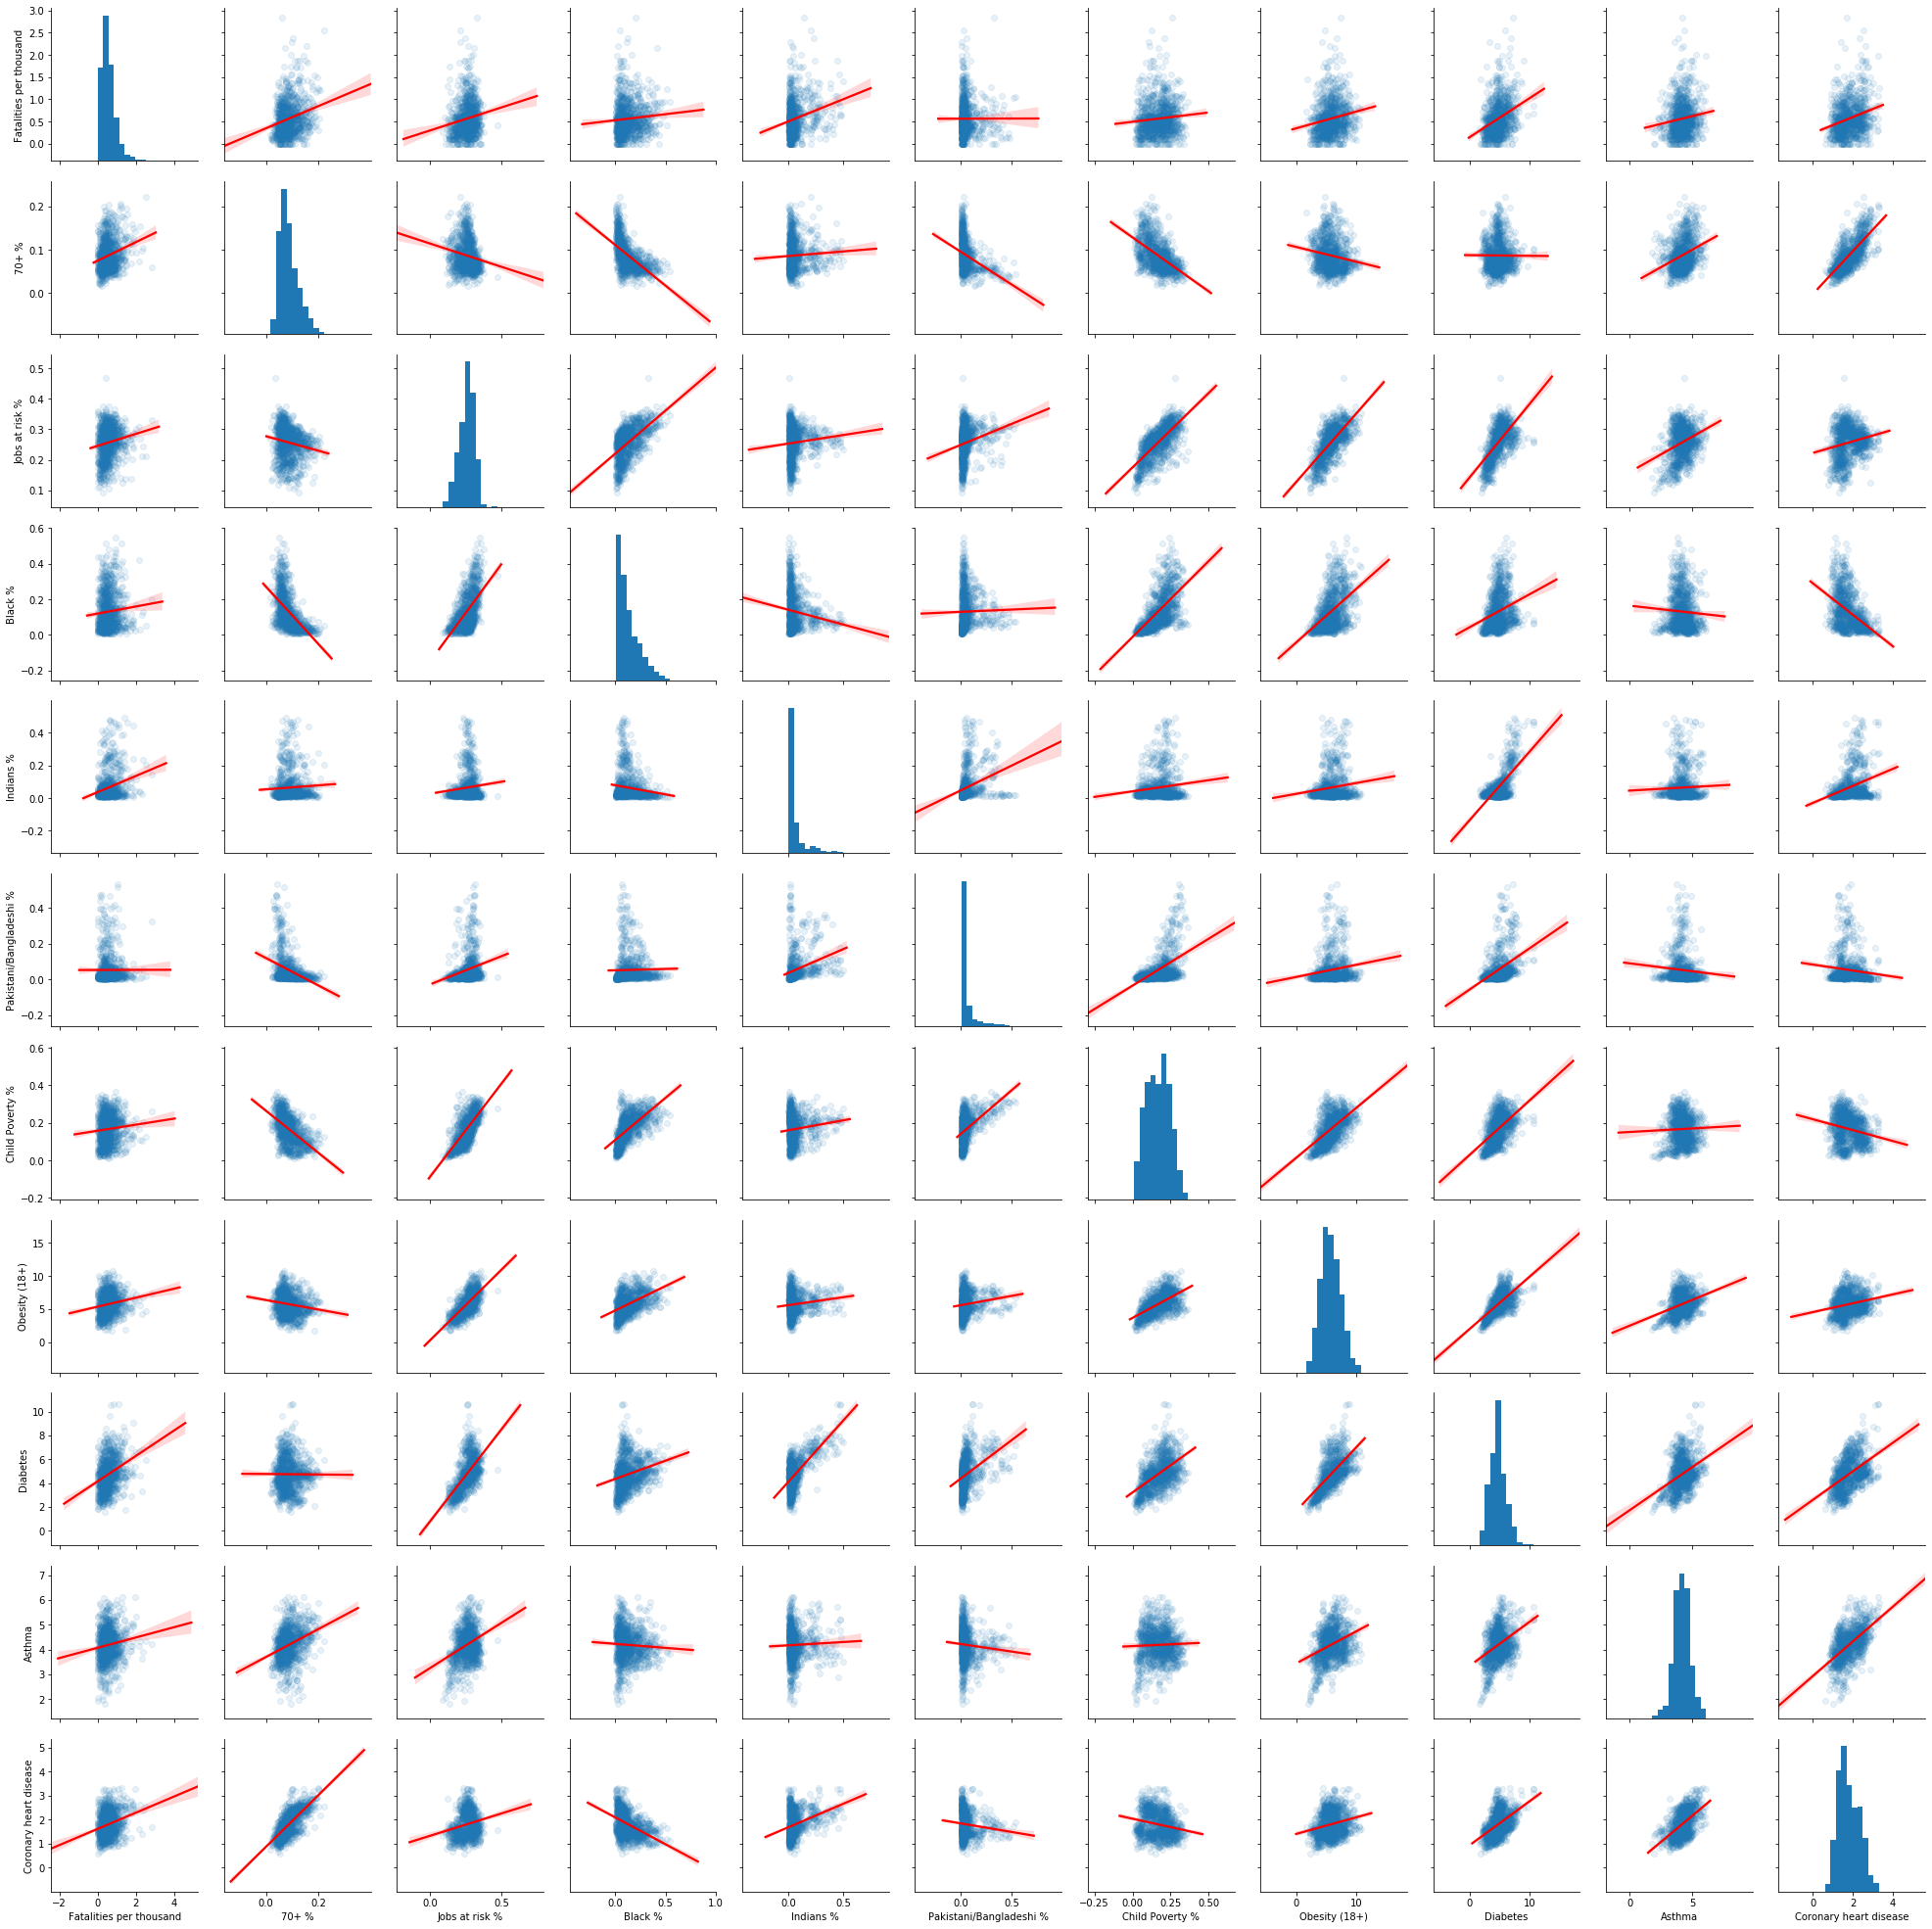

In [12]:
sns.pairplot(dataset[['Fatalities per thousand', '70+ %', 'Jobs at risk %', 'Black %', 'Indians %','Pakistani/Bangladeshi %', 
                 'Child Poverty %', 'Obesity (18+)', 'Diabetes', 'Asthma','Coronary heart disease']], 
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Same information as the plot above are revealed in the heatmap and in the correlation matrix below.

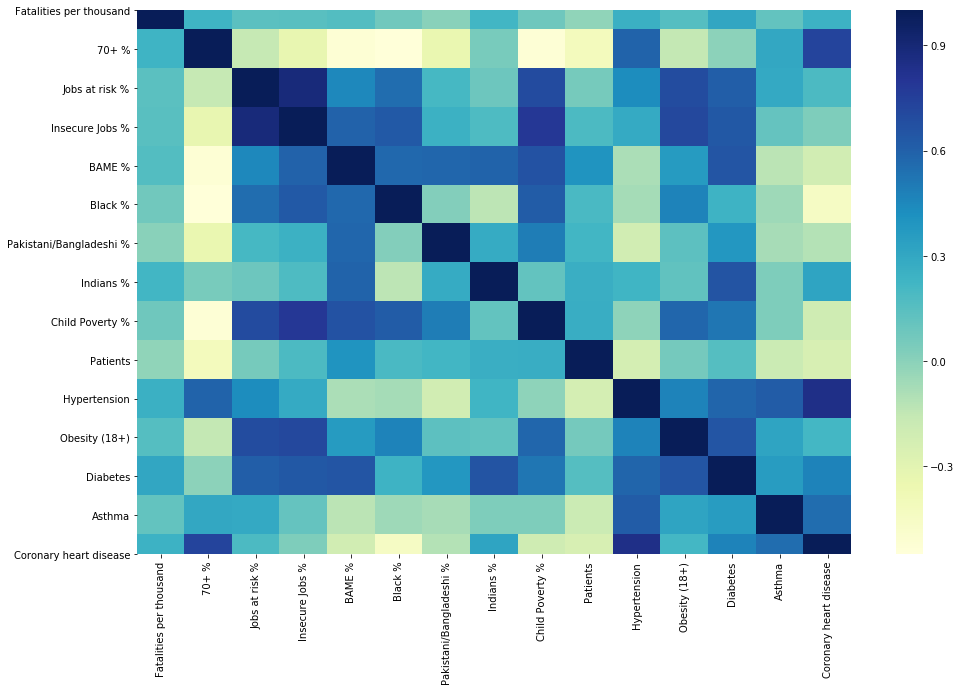

In [13]:
datacorel = dataset.drop(columns=[ 'MSOA11CD', 'MSOA11NM', 'BOROUGH', 'Fatalities', 'Population'])

plt.figure(figsize = (16,10))
sns.heatmap(datacorel.corr(),annot = False, cmap="YlGnBu")

In [14]:
datacorel.corr(method='pearson').round(2)

,Fatalities per thousand,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
Fatalities per thousand,1.00,0.23,0.14,0.15,0.17,0.07,0.00,0.22,0.08,-0.01,0.26,0.16,0.31,0.12,0.25
70+ %,0.23,1.00,-0.16,-0.33,-0.53,-0.55,-0.34,0.05,-0.53,-0.41,0.59,-0.16,-0.01,0.30,0.73
Jobs at risk %,0.14,-0.16,1.00,0.89,0.45,0.56,0.21,0.09,0.70,0.06,0.43,0.70,0.61,0.29,0.19
Insecure Jobs %,0.15,-0.33,0.89,1.00,0.60,0.63,0.25,0.18,0.79,0.19,0.29,0.71,0.64,0.11,0.03
BAME %,0.17,-0.53,0.45,0.60,1.00,0.57,0.58,0.59,0.66,0.40,-0.09,0.37,0.65,-0.13,-0.21
Black %,0.07,-0.55,0.56,0.63,0.57,1.00,0.02,-0.14,0.62,0.20,-0.07,0.47,0.24,-0.05,-0.44
Pakistani/Bangladeshi %,0.00,-0.34,0.21,0.25,0.58,0.02,1.00,0.28,0.49,0.22,-0.22,0.14,0.38,-0.07,-0.11
Indians %,0.22,0.05,0.09,0.18,0.59,-0.14,0.28,1.00,0.12,0.26,0.23,0.13,0.66,0.03,0.32
Child Poverty %,0.08,-0.53,0.70,0.79,0.66,0.62,0.49,0.12,1.00,0.27,-0.01,0.58,0.52,0.03,-0.20
Patients,-0.01,-0.41,0.06,0.19,0.40,0.20,0.22,0.26,0.27,1.00,-0.23,0.06,0.16,-0.19,-0.25


In case someone prefers to have a deeper look on the associations between Covid-19 fatalities and other variables the below pairplot can answer their questions.  

C:\Users\nastu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


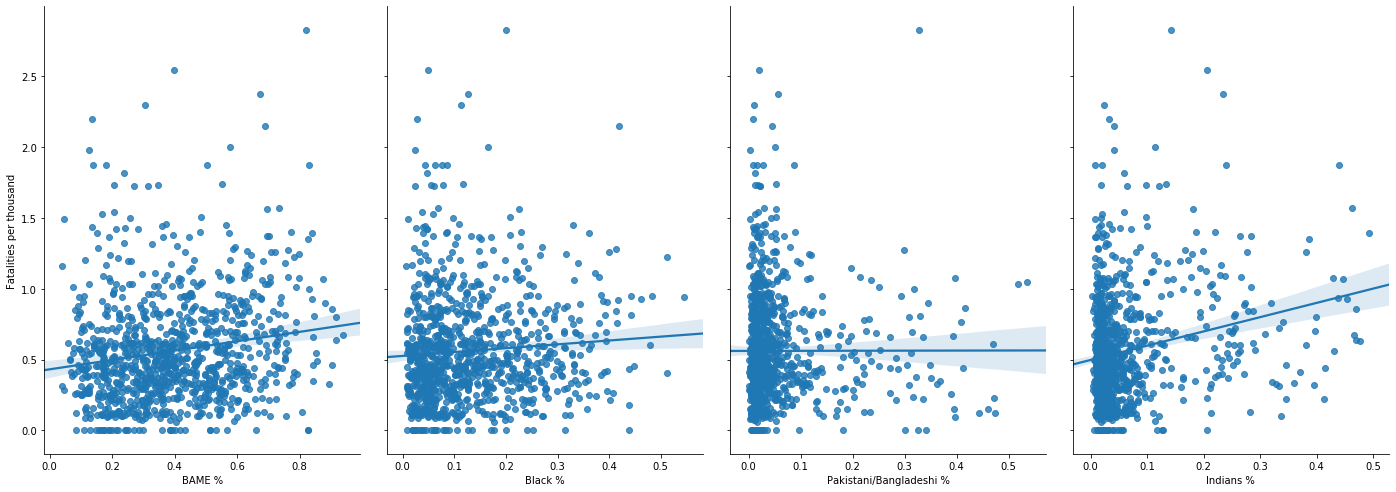

In [15]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['BAME %', 'Black %', 'Pakistani/Bangladeshi %','Indians %'], 
             y_vars='Fatalities per thousand',size=7, aspect=0.7, kind='reg')

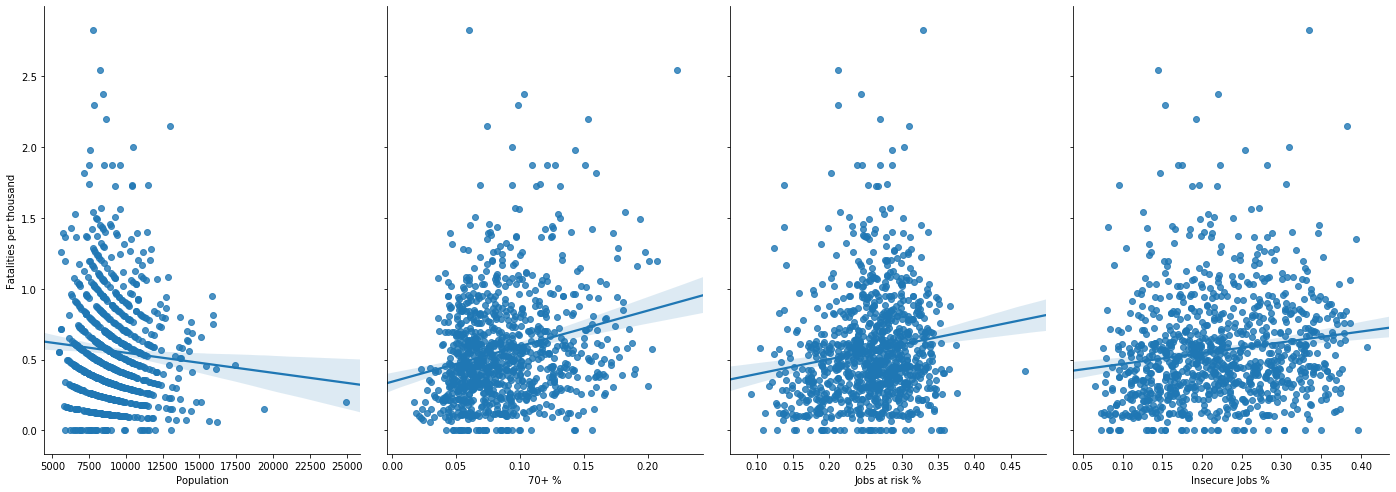

In [16]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Population', '70+ %', 'Jobs at risk %','Insecure Jobs %'], 
             y_vars='Fatalities per thousand',size=7, aspect=0.7, kind='reg')

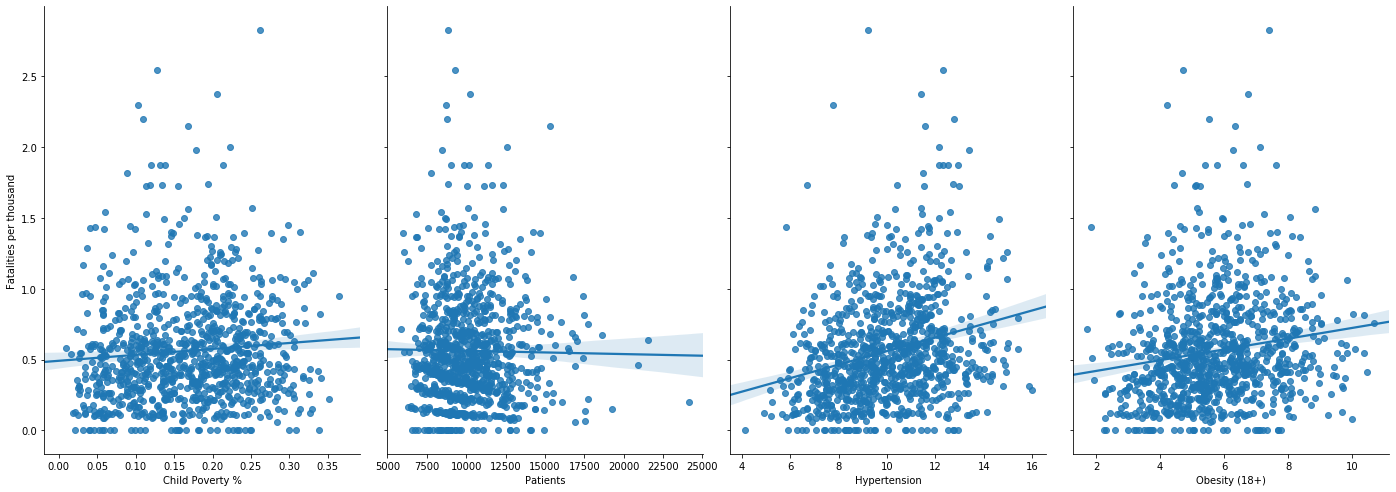

In [17]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Child Poverty %', 'Patients', 'Hypertension','Obesity (18+)'], 
             y_vars='Fatalities per thousand',size=7, aspect=0.7, kind='reg')


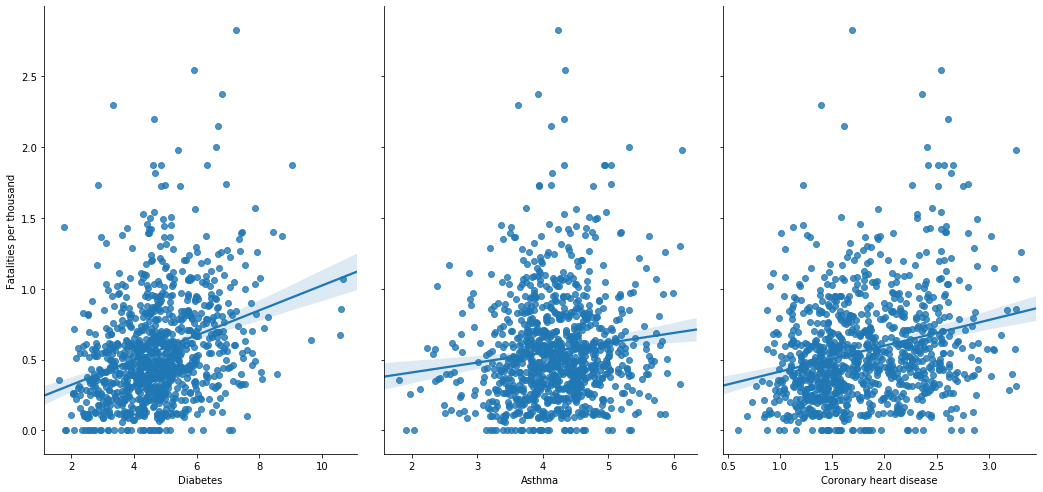

In [18]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Diabetes', 'Asthma', 'Coronary heart disease'], 
             y_vars='Fatalities per thousand',size=7, aspect=0.7, kind='reg')

The regplot below offers even more posibilities to edit the plot(s) although it reveals the same content in a wider format. 

Text(0.5, 1.0, 'Association of Proportion over 70 in MSOA and Covid 19 Fatalities per thousand')

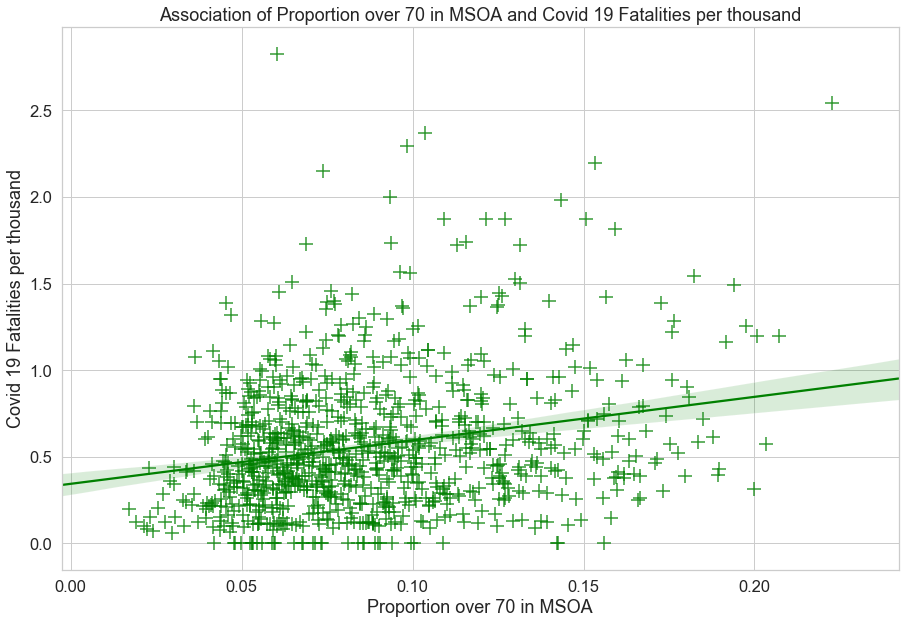

In [19]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='70+ %', y='Fatalities per thousand', data=dataset, color='green', 
                 marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Proportion over 70 in MSOA', ylabel='Covid 19 Fatalities per thousand')
ax.set_title('Association of Proportion over 70 in MSOA and Covid 19 Fatalities per thousand')

The **Hexbin plot with marginal distributions** shows additionally the histogram for each variable while the intensity of the association is revealed through the intensity of colour. Even the **Two-Dimensional KDE Plot** can represent a manner of exposing the relation between two variables showing the concentration of points through colour intensity.  


<Figure size 864x864 with 0 Axes>

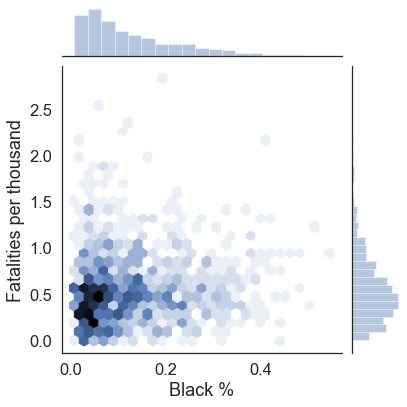

In [20]:
plt.figure(figsize=(12, 12))
with sns.axes_style('white'):
    sns.jointplot(x='Black %',y='Fatalities per thousand',kind='hex',data=dataset)

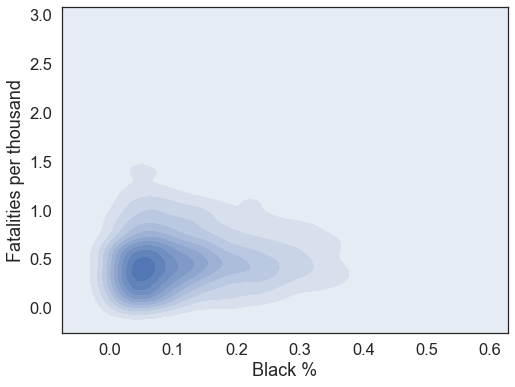

In [21]:
plt.figure(figsize=(8, 6))
with sns.axes_style('white'):
    sns.kdeplot(dataset['Black %'], dataset['Fatalities per thousand'], shade=True)



<h2 align=center><font size = 3> 3. Performing Multiple Regression Model </font></h2>

#### 3.1. Splitting the Data for Training and Testing

Following the visualisation of association between different variables and the Covid-19 fatalities it can be concluded the following predictors can be included in the multiple regression model: 
* percent of **70+**, 
* percent of **Jobs at risk**, 
* percent of **Black** and 
* percent of **Indians**, 
* percent with **Hypertension**, 
* percent with **Diabetes**, and 
* percent with **Coronary heart disease** in the MSOA. 

In [22]:
# Putting feature variable to X
  
X = dataset[['70+ %', 'Jobs at risk %', 'Indians %', 'Black %','Hypertension', 'Diabetes', 'Coronary heart disease']]

# Putting response variable to y
y = dataset['Fatalities per thousand']

In [23]:
#random_state is the seed used by the random number generator. It can be any integer.
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

#### 3.2. Performing Linear Regression on the training dataset

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [26]:
# fit the regression model to the TRAINING DATA
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 3.3. Model Evaluation on Test Dataset

In [27]:
# print the intercept
print(lm.intercept_)

0.04533413003716247


In [28]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
70+ %,4.638987
Jobs at risk %,-0.869904
Indians %,-0.037015
Black %,1.153550
Hypertension,-0.057030
Diabetes,0.110163
Coronary heart disease,0.126690


In [29]:
# Making predictions using the model on the TEST dataset

y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

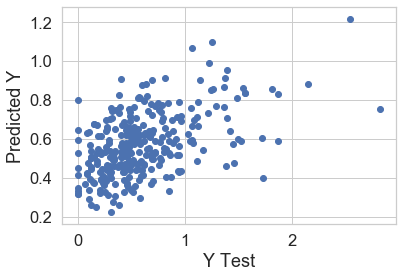

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Plotting the observed **Fatalities per thousand** in the test dataset against the predicted values in the scatter plot above it can be concluded the model is relatively good and positively correlated although is not performing extremelly well considering they are not very strongly correlated. 

The model explains 23% (17.2% according to adjusted R-squared) of the variance of the target variable. On average, predictions have an error of 0.28 fatalities per thousand, or they’re wrong by 534%. Considering the average fatalities per thousand is 0.56 this suggest we might be wrong by about 3 deaths per thousand which is not desirable.

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [32]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))
print('Error in %:', (np.mean(y_test - y_pred) / np.mean(y_pred)) * 100)
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square :',r_squared.round(3))


MAE: 0.276
Error in %: 5.344669127766233
MSE: 0.143
RMSE: 0.37873788104895106
R square : 0.231


#### 3.3.1. Residuals

Using seaborn distplot we can explore the normality of residuals to assess if the model is a good fit. 

The residuals of regression model applied on test data indicate these are overall normally distributed although they reveals some outliers which were discussed before. Most residuals are between -0.5 and +0.5 suggesting the model can predict around $\pm$ 0.5 fatalities per thousand. In some MSOA it will predict 0.5 more in other less 0.5 less. There is, however, a tendency to predict less fatalities.  


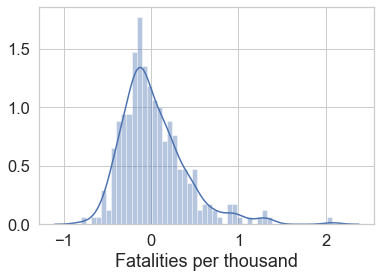

In [33]:
sns.distplot((y_test - y_pred),bins=50);


In [34]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
#lm_1.params

C:\Users\nastu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
print(lm_1.summary())

                               OLS Regression Results                              
Dep. Variable:     Fatalities per thousand   R-squared:                       0.180
Model:                                 OLS   Adj. R-squared:                  0.172
Method:                      Least Squares   F-statistic:                     21.38
Date:                     Thu, 18 Jun 2020   Prob (F-statistic):           3.88e-26
Time:                             00:12:43   Log-Likelihood:                -205.25
No. Observations:                      688   AIC:                             426.5
Df Residuals:                          680   BIC:                             462.8
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

#### 3.4. Performing an adjusted multiple regression model

The regression model and the steps performed above were repeated with a simplified model from which two variables were excluded as they were not statistically significant.

In [36]:
# Removing the 2 features which are not statistically significant from our dataset

X_train_new = X_train[['70+ %', 'Jobs at risk %', 'Black %','Hypertension', 'Diabetes']]
X_test_new = X_test[['70+ %', 'Jobs at risk %', 'Black %','Hypertension', 'Diabetes']]


In [37]:
# Model building
lm.fit(X_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Making predictions
y_pred_new = lm.predict(X_test_new)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)


The model explains 23% (*17.1% according to adjusted R-squared*) of the variance of the target variable. On average, predictions have an error of 0.28 fatalities per thousand, or they’re wrong by 570%. Considering the average fatalities per thousand is 0.56 this suggest we might be wrong by about 3 - 4 deaths per thousand which is not desirable. This suggest that even this model is preferable because it has fewer features it is equally poor in terms of predicting the number of Covid-19 fatalities from London MSOA-s. 

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_new).round(3))
print('Error in %:', (np.mean(y_test - y_pred_new) / np.mean(y_pred_new)) * 100)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_new).round(3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_new)))
print('R square :',r_squared.round(3))

MAE: 0.277
Error in %: 5.703834435489247
MSE: 0.144
RMSE: 0.37894280218013704
R square : 0.23


In [41]:
X_train_final = X_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                               OLS Regression Results                              
Dep. Variable:     Fatalities per thousand   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.171
Method:                      Least Squares   F-statistic:                     29.27
Date:                     Thu, 18 Jun 2020   Prob (F-statistic):           5.86e-27
Time:                             00:12:59   Log-Likelihood:                -206.82
No. Observations:                      688   AIC:                             425.6
Df Residuals:                          682   BIC:                             452.8
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\nastu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Percent of 70+** is associated with a significant **increase of 5 fatalities per thousand**.
- Holding all other features fixed, a 1 unit increase in **Percent Jobs at Risk** is associated with a significant **decrease of 0.76 fatalities per thousand**.
- Holding all other features fixed, a 1 unit increase in **percent of Black** is associated with a significant **increase of 0.91 fatalities per thousand**.
- Holding all other features fixed, a 1 unit increase in **Percent Hypertension** is associated with a significant **decrease of 0.04 fatalities per thousand**.
- Holding all other features fixed, a 1 unit increase in **Percent Diabetes** is associated with a significant **decrease of 0.11 fatalities per thousand**.

Text(0, 0.5, 'Predicted Y')

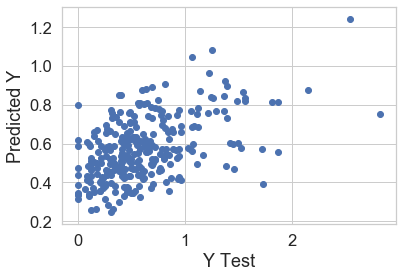

In [42]:
plt.scatter(y_test,y_pred_new)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Conclusion 

The models above revealed the main significant predictors positivelly associated with Covid-19 deaths in London MSOA-s are **Age** and **Percent of Black**. 
On the other hand, although they are significant the proposed **models are not explaining too much of Fatalities per thousand's variability**. To sort this limitation I will perform further analysis and probably apply other regression types in a separate Jupyter Notebook.  

* If you read this Notebook please email me any comments or suggestions to my email sebastian@bianalytics.org

